In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv(r'C:\Users\Anindita\Desktop\Codsoft\spam mssg\spam.csv',encoding='ANSI')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print("Unique values in the v1 set: ", data.v1.unique())

Unique values in the v1 set:  ['ham' 'spam']


In [7]:
data.rename(columns={'v1':'Class','v2':'Text'},inplace=True)
data['numClass'] = data['Class'].map({'ham':0, 'spam':1})
data['Count']=0
for i in np.arange(0,len(data.Text)):
    data.loc[i,'Count'] = len(data.loc[i,'Text'])

ham  = data[data.numClass == 0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print("Number of ham messages in data set:", ham['Class'].count())

spam = data[data.numClass == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print("Number of spam messages in data set:", spam['Class'].count())

Number of ham messages in data set: 4825
Number of spam messages in data set: 747


In [8]:
stopset = set(stopwords.words("english"))

In [9]:
X = data['Text']
y = data['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")



Training set has 4457 samples.
Testing set has 1115 samples.




In [11]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
objects = ('Multi-NB','SVM')

In [13]:
def train_classifier(clf, X_train_tfidf, y_train):    
    clf.fit(X_train_tfidf, y_train)

In [14]:
def predict_labels(clf, features):
    return(clf.predict(features))

In [15]:
A = MultinomialNB(alpha=1.0,fit_prior=True)
B=  LinearSVC()

In [16]:
clf = [A,B]
acc_score = [0,0]

In [17]:
for a in range(0,2):
    print(objects[a])
    train_classifier(clf[a], X_train_tfidf, y_train)
    y_pred = predict_labels(clf[a],X_test_tfidf)
    acc_score[a]=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("\n")

Multi-NB
Accuracy in %:
96.50224215246637


SVM
Accuracy in %:
98.65470852017937




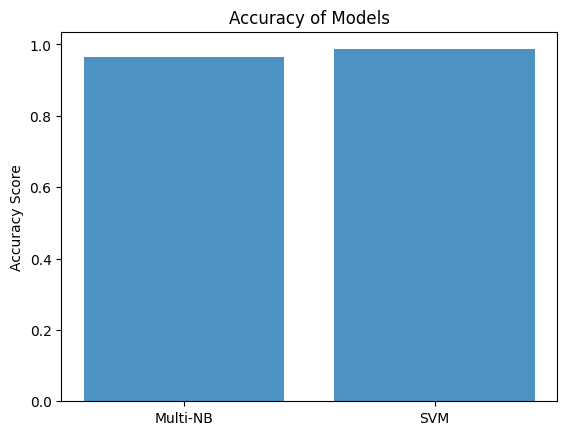

In [18]:
y_pos = np.arange(len(objects))
y_val = [ x for x in acc_score]
plt.bar(y_pos,y_val, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

In [19]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Confusion Matrix:
 [[967   3]
 [ 12 133]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       970
        spam       0.98      0.92      0.95       145

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

